In [3]:
import pandas as pd 
import numpy as np 
df=pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Loan%20Approval%20Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
num_features = ["ApplicantIncome", 	"CoapplicantIncome" , "LoanAmount" , "Loan_Amount_Term" , "Credit_History"]
cat_features = ["Gender","Married","Education","Dependents","Self_Employed","Property_Area","Loan_Status" ]

In [9]:
df['ApplicantIncome'].mean()

5403.459283387622

In [10]:
df['Gender'].mode()[0]

'Male'

In [11]:
for col in num_features:
    df[col]=df[col].fillna(df[col].mean())
for col in cat_features:
    df[col]=df[col].fillna(df[col].mode()[0])   

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
df['ApplicantIncome']=pd.to_numeric(df['ApplicantIncome'],errors='coerce')
df['CoapplicantIncome']=pd.to_numeric(df['ApplicantIncome'],errors='coerce')
df['ApplicantIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,11698,5849,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,9166,4583,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,6000,3000,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,5166,2583,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,12000,6000,141.000000,360.0,1.0,Urban,Y


In [16]:
df=df.drop(['Loan_ID','CoapplicantIncome'],axis ='columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,11698,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,9166,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,6000,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,5166,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,12000,141.000000,360.0,1.0,Urban,Y


In [17]:
df.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
ApplicantIncome     505
LoanAmount          204
Loan_Amount_Term     11
Credit_History        3
Property_Area         3
Loan_Status           2
dtype: int64

## Perfom data encoding to convert non-numerical columns into numericals

In [18]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())


['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [19]:
df1=df.copy()

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,11698,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,9166,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,6000,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,5166,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,12000,141.000000,360.0,1.0,Urban,Y


In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
label_encoding_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' ,'Loan_Status'] 

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


for col in label_encoding_columns:
  df1[col] = encoder.fit_transform(df1[col])

In [23]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,11698,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,9166,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,6000,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,5166,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,12000,141.000000,360.0,1.0,Urban,Y


# one hot encoding for property area

In [24]:
pd.get_dummies(df1['Property_Area'])

,Rural,Semiurban,Urban
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
609,True,False,False
610,True,False,False
611,False,False,True
612,False,False,True


In [25]:
df2=pd.get_dummies(df1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,11698,146.412162,360.0,1.0,1,False,False,True
1,1,1,1,0,0,9166,128.000000,360.0,1.0,0,True,False,False
2,1,1,0,0,1,6000,66.000000,360.0,1.0,1,False,False,True
3,1,1,0,1,0,5166,120.000000,360.0,1.0,1,False,False,True
4,1,0,0,0,0,12000,141.000000,360.0,1.0,1,False,False,True


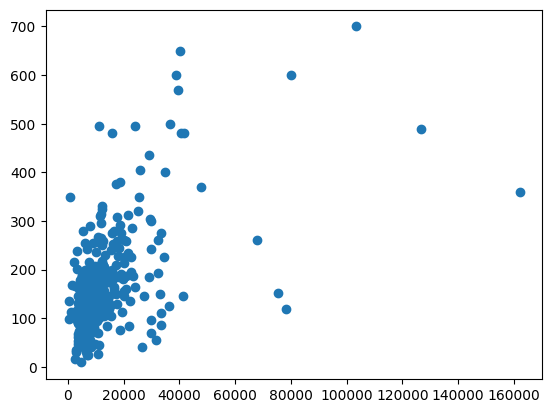

In [30]:
import matplotlib.pyplot as plt 
plt.scatter(df2['ApplicantIncome'],df2['LoanAmount'])
plt.show()

## using logistic and knn algoritm to train model 

In [28]:
X = df2.drop('Loan_Status', axis='columns')
Y = df2['Loan_Status']

 ### perfoming Oversampling for unbalanced data distribution 

In [34]:
!pip install imbalanced-learn 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
Xr,Yr = sampler.fit_resample(X,Y)

In [35]:
Yr.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [36]:
#split train and test 

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xr,Yr,train_size = 0.75)

In [38]:
# feature scaling or data normalisation 

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
Scaler.fit(xtrain)
xtrainScaled=Scaler.transform(xtrain)
xtestScaled= Scaler.transform(xtest)

In [40]:
dfScaled = pd.DataFrame(xtrainScaled, columns = xtrain.columns)
dfScaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1.0,0.333333,0.0,1.0,0.010513,0.170897,0.74359,1.0,0.0,0.0,1.0
1,0.0,0.0,0.000000,0.0,1.0,0.054830,0.209814,0.74359,0.0,0.0,1.0,0.0
2,1.0,1.0,0.333333,0.0,0.0,0.076376,0.280880,0.74359,1.0,0.0,1.0,0.0
3,1.0,0.0,0.000000,1.0,0.0,0.043797,0.170897,0.74359,1.0,1.0,0.0,0.0
4,1.0,1.0,0.666667,0.0,0.0,0.062276,0.247039,0.74359,1.0,0.0,1.0,0.0


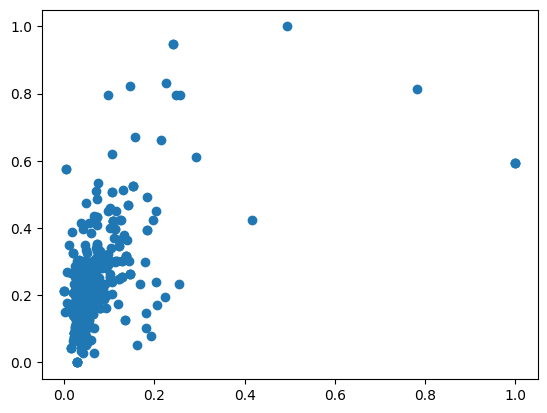

In [41]:
plt.scatter(dfScaled['ApplicantIncome'], dfScaled['LoanAmount'])
plt.show()

In [42]:
#train model using kNN

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 5)
model1.fit(xtrainScaled,ytrain)

KNeighborsClassifier()

In [44]:
#Train model using Logistic 

from sklearn.linear_model import LogisticRegression 
model2 = LogisticRegression()
model2.fit(xtrainScaled,ytrain)

LogisticRegression()

## Evaluating model performance

In [45]:
## evaluating KNN model performance

print("Training Data", model1.score(xtrainScaled,ytrain))
print("Test Data", model1.score(xtestScaled,ytest))


Training Data 0.8309636650868878
Test Data 0.7061611374407583
